# Linear Algebra Homework Assignment 4

Please finish all TODOS in this ipynb file

In [5]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Function that help convert the image to gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [7]:
def compress_image_by_svd(image: np.ndarray, rank: int) -> np.ndarray:
    # [TODO] Compress the image by SVD, return the compressed image and the singular values.
    # Notice that the type of compressed image should be np.uint8
    # Hint: You can use some function provided in numpy to finish
    U, S, V = np.linalg.svd(image, full_matrices=False)
    U_rank = U[:, :rank]
    S_rank = np.diag(S[:rank])
    V_rank = V[:rank, :]
    compressed_image = np.dot(U_rank, np.dot(S_rank, V_rank))
    compressed_image = np.clip(compressed_image, 0, 255)
    compressed_image = np.uint8(compressed_image)
    return compressed_image, S

def compression_ratio(height, width, rank):
    # [TODO] Implement this function, please follow the formula given in the homework assignment pdf file
    up= height * rank + rank + rank * width
    down= height * width
    return up/down

def average_relative_difference(original_image: np.ndarray, compressed_image: np.ndarray, epsilon=1e-8) -> float:
    # [TODO] Implement this function, please follow the formula given in the homework assignment pdf file
    # Notice that epsilon (ϵ) should be used to avoid division by zero
    diff = np.abs(original_image - compressed_image)
    divisor = original_image + epsilon
    relative_difference = diff / divisor
    delta = np.mean(relative_difference) #average function
    return delta

The size of the image is: 637 x 511
Compression ratio is: 0.176494
Average relative difference is: 0.048342


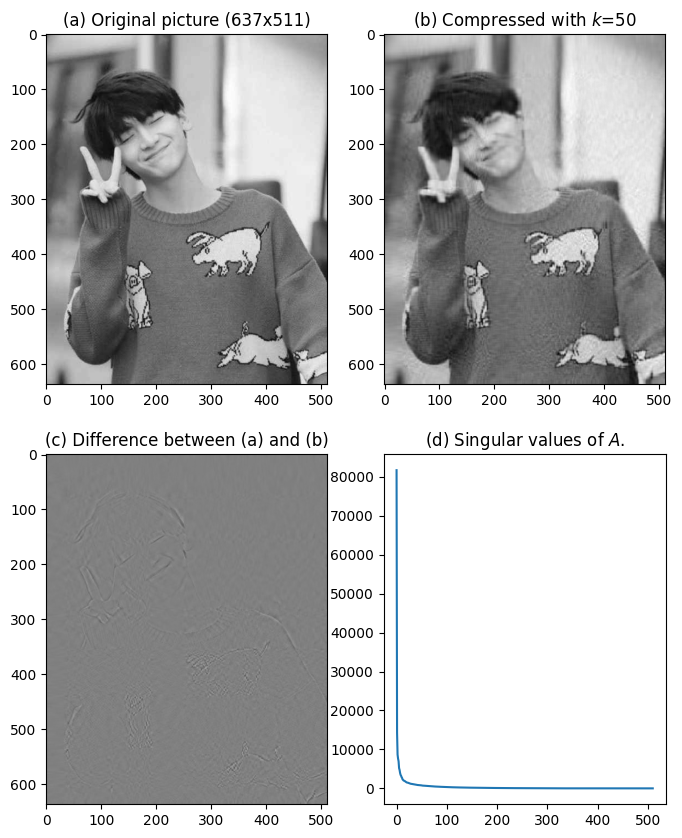

In [8]:
plt.figure(figsize=(8, 10))

# Read the image and convert it to gray scale
original_image = rgb2gray(imageio.imread('/511x637.jpg'))
height, width = np.shape(original_image)
print("The size of the image is: {} x {}".format(height, width))

# Display the original image
f1 = plt.subplot(221)
f1.set_title("(a) Original picture ({}x{})".format(height, width))
plt.imshow(original_image, cmap="gray")

# Perform compresion by SVD
rank = 50
compressed_image, image_singular_values = compress_image_by_svd(original_image, rank)


# Display the compressed image
f2 = plt.subplot(222)
f2.set_title("(b) Compressed with $k$={}".format(rank))
plt.imshow(compressed_image, cmap="gray")
print("Compression ratio is: {:.6f}".format(compression_ratio(height, width, rank)))

# Display the difference between the original image and the compressed image
f3 = plt.subplot(223)
f3.set_title("(c) Difference between (a) and (b)")
plt.imshow(original_image-compressed_image, cmap="gray", vmin=-255, vmax=255)

# Compute the average relative difference between the original image and the compressed image
print("Average relative difference is: {:.6f}".format(average_relative_difference(original_image, compressed_image)))

# Display the singular values
f4 = plt.subplot(224)
f4.set_title("(d) Singular values of $A$.")
plt.plot(range(len(image_singular_values)), image_singular_values)
plt.show()